In [1]:
import pandas as pd

import sys
import os
import numpy as np

import scipy.sparse as sp
import scipy.io as spio

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import norm

from prepare_aparent_data_helpers import *

import isolearn.io as isoio



<h2>Load and Aggregate designed MPRA</h2>
<br/>
Load the processed dataframe and cut matrix of the designed MPRA library.
<br/>
Group and aggregate the dataset as four separate versions:<br/>
-- Group by: Barcode+Sequence and Version <br/>
-- Group by: Barcode+Sequence <br/>
-- Group by: Sequence and Version <br/>
-- Group by: Sequence <br/>
<br/>
Version corresponds to two independent library constructions: (1) LoFi Array (2) HiFi Array.<br/>
Sequence corresponds to the 50 nt USE - 6 nt CSE - 108 nt DSE designed sequence.<br/>
Barcode corresponds to the 20 nt random barcode sequence placed upstream of the USE. <br/>


In [2]:
#Load Array data

library_name = 'array_noacut_score_50'
library_version = 'unfiltered'

#Read dataframe and cut matrices
folder_path = 'designed_mpra/processed_data/' + library_version + '/'

df = pd.read_csv(folder_path + library_name + '_' + library_version + '_misprime_mapped.csv', delimiter=',').reset_index(drop=True)
cuts = spio.loadmat(folder_path + library_name + '_' + library_version + '_cuts.mat')['cuts']
print(len(df))

clinvar_snv_df = pd.read_csv('clinvar_data/processed_data/clinvar_variants.csv', delimiter=('\t'))

misprime_filters = {
    'max_iso' : ['misprime_16_of_20'],
    'max_cut' : ['misprime_16_of_20'],
    'tgta' : ['misprime_16_of_20'],
    
    'clinvar_wt' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'clinvar_mut' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'intronic_pas' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'acmg_apadb' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'acmg_polyadb' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'sensitive_genes' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
    'human variant' : ['misprime_10_of_12', 'misprime_12_of_16', 'misprime_15_of_20'],
}

seq_ver_df_group = group_dataframe(df, cuts, min_total_count=100, drop_nans=False, misprime_filters=misprime_filters, groupby_list=['seq', 'array_version'])

seq_ver_df_group = seq_ver_df_group.reset_index()
seq_ver_df_group['flat_index'] = seq_ver_df_group['seq'] + '_' + seq_ver_df_group['array_version']
seq_ver_df_group = seq_ver_df_group.set_index('flat_index')

seq_ver_df = summarize_dataframe(
                    seq_ver_df_group,
                    min_barcodes=1,
                    min_pooled_count=1,
                    min_mean_count=1,
                    prox_cut_start=70 + 7,
                    prox_cut_end=70 + 7 + 30,
                    isoform_pseudo_count=1.0,
                    pooled_isoform_pseudo_count=2.0,
                    cut_pseudo_count=0.0005,
                    drop_nans=False#True
)

seq_ver_df = manual_df_processing(seq_ver_df, clinvar_snv_df)

print('Size(seq_ver_df) = ' + str(len(seq_ver_df)))

seq_df_group = group_dataframe(df, cuts, min_total_count=100, drop_nans=False, misprime_filters=misprime_filters, groupby_list=['seq'])

seq_df = summarize_dataframe(
                    seq_df_group,
                    min_barcodes=1,
                    min_pooled_count=1,
                    min_mean_count=1,
                    prox_cut_start=70 + 7,
                    prox_cut_end=70 + 7 + 30,
                    isoform_pseudo_count=1.0,
                    pooled_isoform_pseudo_count=2.0,
                    cut_pseudo_count=0.0005,
                    drop_nans=False#True
)

seq_df = manual_df_processing(seq_df, clinvar_snv_df)

print('Size(seq_df) = ' + str(len(seq_df)))

master_seq_ver_df_group = group_dataframe(df, cuts, cut_start=20, min_total_count=100, drop_nans=False, misprime_filters=misprime_filters, groupby_list=['master_seq', 'array_version'])

master_seq_ver_df_group = master_seq_ver_df_group.reset_index()
master_seq_ver_df_group['flat_index'] = master_seq_ver_df_group['master_seq'] + '_' + master_seq_ver_df_group['array_version']
master_seq_ver_df_group = master_seq_ver_df_group.set_index('flat_index')

master_seq_ver_df = summarize_dataframe(
                    master_seq_ver_df_group,
                    min_barcodes=1,
                    min_pooled_count=1,
                    min_mean_count=1,
                    prox_cut_start=50 + 7,
                    prox_cut_end=50 + 7 + 30,
                    isoform_pseudo_count=1.0,
                    pooled_isoform_pseudo_count=2.0,
                    cut_pseudo_count=0.0005,
                    drop_nans=False#True
)

master_seq_ver_df = manual_df_processing(master_seq_ver_df, clinvar_snv_df)

print('Size(master_seq_ver_df) = ' + str(len(master_seq_ver_df)))

master_seq_df_group = group_dataframe(df, cuts, cut_start=20, min_total_count=100, drop_nans=False, misprime_filters=misprime_filters, groupby_list=['master_seq'])

master_seq_df = summarize_dataframe(
                    master_seq_df_group,
                    min_barcodes=1,
                    min_pooled_count=1,
                    min_mean_count=1,
                    prox_cut_start=50 + 7,
                    prox_cut_end=50 + 7 + 30,
                    isoform_pseudo_count=1.0,
                    pooled_isoform_pseudo_count=2.0,
                    cut_pseudo_count=0.0005,
                    drop_nans=False#True
)

master_seq_df = manual_df_processing(master_seq_df, clinvar_snv_df)

print('Size(master_seq_df) = ' + str(len(master_seq_df)))

444220
Collapsing with groupby = ['master_seq', 'array_version']
Filtering...
Size before filtering = 444220
Size after filtering = 323890
Grouped dataframe.
Filtering...
Summarizing...
Dropping intermediate columns...
Size(master_seq_ver_df) = 79078
Collapsing with groupby = ['master_seq']
Filtering...
Size before filtering = 444220
Size after filtering = 323890
Grouped dataframe.
Filtering...
Summarizing...
Dropping intermediate columns...
Size(master_seq_df) = 39833



<h3>Consolidate designed MPRA</h3>
<br/>
Re-format the Barcode+Sequence- grouped designed MPRA to the same column and sequence format as the random MPRA library.


In [4]:
#Format array data to have identical columns and sequence padding as random MPRA library

array_df = seq_df.copy()

array_df['mask'] = ('N' * 206)
array_df['proximal_count'] = array_df['pooled_proximal_count']
array_df['distal_count'] = array_df['pooled_distal_count']
array_df['total_count'] = array_df['pooled_total_count']
array_df['library'] = 'array'
array_df['library_index'] = 40
array_df['sublibrary'] = array_df['gene']#'array'
array_df['sublibrary_index'] = 40

array_df = array_df[[
    'seq',
    'mask',
    'proximal_count',
    'distal_count',
    'total_count',
    'library',
    'library_index',
    'sublibrary',
    'sublibrary_index'
]]

up_padding = 'XXXXXXXXXXTACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCT'
dn_padding = 'TGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCA'

array_metadata = pd.DataFrame([['array', 40, 'array', 40, up_padding, dn_padding]], columns=['library', 'library_index', 'sublibrary', 'sublibrary_index', 'upstream_padding', 'downstream_padding'])

array_cuts = sp.csr_matrix(np.array(list(seq_df['pooled_cuts'].values))[:, :-1])

<h2>Load and Merge random MPRA</h2>
<br/>
Load the processed dataframe and cut matrix of the random MPRA library.<br/>
Append the designed MPRA dataframe and matrix to the random MPRA library.

In [5]:
#Load plasmid dataframe and cut matrices

library_name = 'combined_random_plasmid_library_v1'
library_version = 'final'

folder_path = 'random_mpra/combined_library/processed_data/final/'

plasmid_library_dict = {}
plasmid_library_dict['metadata'] = pd.read_csv(folder_path + library_name + '_metadata.csv', sep=',').reset_index(drop=True)
plasmid_library_dict['data'] = pd.read_csv(folder_path + library_name + '_' + library_version + '.csv', sep=',').reset_index(drop=True)

plasmid_library_dict['cuts'] = spio.loadmat(folder_path + library_name + '_' + library_version + '_cuts.mat')['cuts']

print('Loaded library size = ' + str(len(plasmid_library_dict['data'])))


Loaded library size = 3632011


In [6]:
#Append array data to plasmid data

plasmid_library_dict['metadata'] = plasmid_library_dict['metadata'].append(array_metadata).reset_index(drop=True)
plasmid_library_dict['data'] = plasmid_library_dict['data'].append(array_df).reset_index(drop=True)
plasmid_library_dict['cuts'] = sp.csr_matrix(sp.vstack([plasmid_library_dict['cuts'], array_cuts]))


<h3>Filter the random + designed MPRA library</h3>
<br/>
Filter the combined dataset on specific sublibraries (e.g., TOMM5, Alien1, etc.) and minimum readcount.


In [7]:
#Filter dataframe and cut matrix with basic library parameters

included_libs = [
    2,  #TOMM5 Random USE Region 1
    5,  #TOMM5 Random USE Region 2
    8,  #TOMM5 Random USE Region 1 and Random DSE
    11, #TOMM5 Random USE Region 2 and Random DSE
    20, #Alien1
    22, #Alien2
    30, #AARS
    31, #ATR
    32, #HSPE1
    33, #SNHG6
    34, #SOX13
    35, #WHAMMP2
    40  #Designed MPRA
]

#Filter library on minimum read count
minimum_count = 1
count_filter = LibraryCountFilter(minimum_count)

#Include only selected sub libraries and re-balance the filtered data.
balancer = LibraryBalancer(included_libs)

plasmid_library_dict = balancer(count_filter(plasmid_library_dict))


print('Prepared library size = ' + str(len(plasmid_library_dict['data'])))

print('Sublibrary counts:')
for lib in included_libs :
    print("Lib " + str(lib) + " = " + str(len(plasmid_library_dict['data'].query("library_index == " + str(lib)))))


Arranging lib 2
Arranging lib 5
Arranging lib 8
Arranging lib 11
Arranging lib 20
Arranging lib 22
Arranging lib 30
Arranging lib 31
Arranging lib 32
Arranging lib 33
Arranging lib 34
Arranging lib 35
Arranging lib 40
Prepared library size = 3818077
Sublibrary counts:
Lib 2 = 220686
Lib 5 = 244218
Lib 8 = 53319
Lib 11 = 194639
Lib 20 = 773340
Lib 22 = 747674
Lib 30 = 30643
Lib 31 = 208306
Lib 32 = 375912
Lib 33 = 483445
Lib 34 = 136874
Lib 35 = 162955
Lib 40 = 186066



<h3>Plot cumulative library proportions</h3>
<br/>
The X-axis displays the percentile in the prepared (random + designed) MPRA data.<br/>
-- The train set will be taken from the left (lower percentile) portion of the data.<br/>
-- The test set will be taken from the right (higher percentile) portion of the data.<br/>
<br/>
The Y-axis displays the relative proportion of each sublibrary, from the given percentile up to 100% of the data.<br/>
-- For example, at 90% of the data, each sublibrary has an equal proportion, meaning the final 10% of the data is perfectly balanced among sublibraries.<br/>


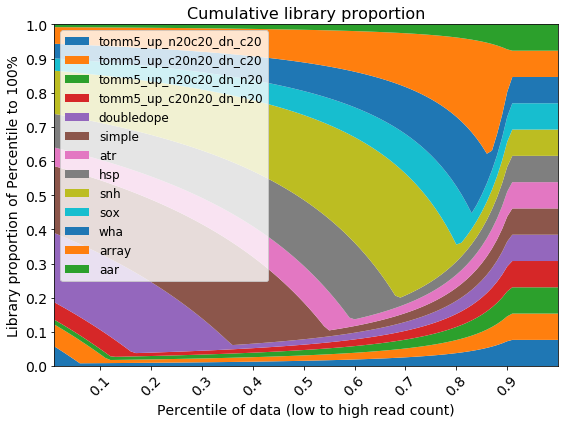

In [107]:
#Plot sublibrary cumulative proportions

plot_cumulative_library_proportion(plasmid_library_dict, percentile_step=0.01, figsize=(8, 6), n_xticks=10, n_yticks=10)



<h3>Plot read count distribution</h3>
<br/>
The X-axis displays the percentile in the prepared (random + designed) MPRA data.<br/>
<br/>
The Y-axis displays the average sequence read depth at the given percentile.<br/>
-- The library is shuffled in such as way that half the high read-count sequences are in the first 50% of the data, improving training performance, while still retaining a high average read depth in the test set (final 10%).<br/>


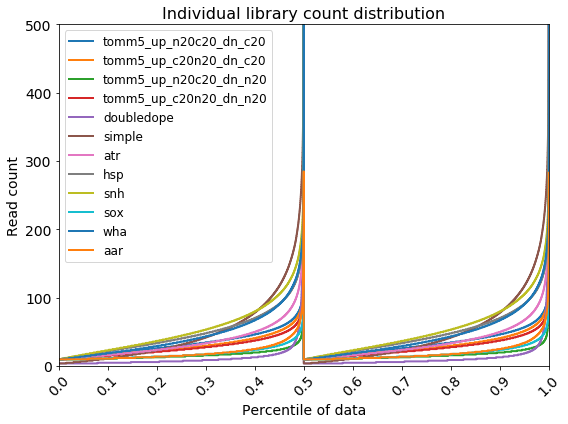

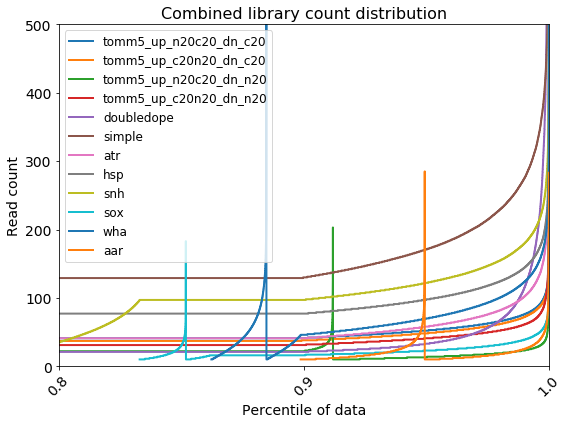

In [37]:
#Plot read count distribution over library

plot_individual_library_count_distribution(plasmid_library_dict, figsize=(8, 6), n_xticks=10, y_max=500)

plot_combined_library_count_distribution(plasmid_library_dict, figsize=(8, 6), n_xticks=10, x_min=0.8, x_max=1, y_max=500)



<h3>Plot cut profiles</h3>
<br/>
The X-axis displays sequence position (position 0 = CSE - 70).<br/>
<br/>
The Y-axis displays the average cleavage proportion at the given nucleotide per sublibrary.<br/>


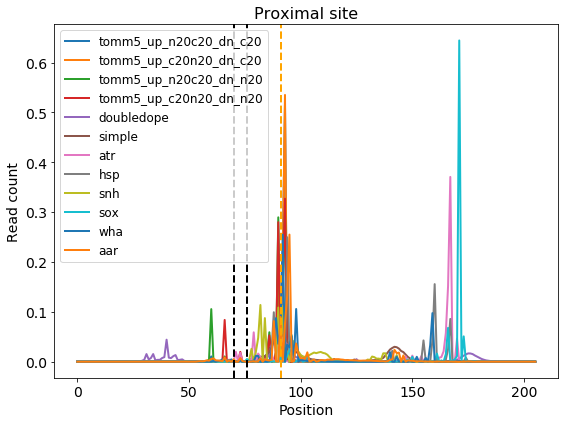

In [9]:
#Plot library cut profiles

plot_library_cut_profile(plasmid_library_dict, figsize=(8, 6))



<h3>Pad and Dump prepared (random + designed) MPRA data</h3>
<br/>
Append constant reporter sequence background upstream and downstream of the randomized sequence regions.<br/>
Dump the prepared dataframe and cut matrix to file.<br/>


In [8]:
#Pad sequences

padding_df = plasmid_library_dict['metadata'][['sublibrary_index', 'upstream_padding', 'downstream_padding']].set_index('sublibrary_index')

library_df = plasmid_library_dict['data'].join(padding_df, on='sublibrary_index')

library_df['padded_seq'] = library_df['upstream_padding'].str.slice(10,190) + library_df['seq'] + library_df['downstream_padding']

print(len(library_df))


3818077


In [9]:
#Prepare cut matrix

cut_mat = sp.csr_matrix(
    sp.hstack([
        sp.csc_matrix((plasmid_library_dict['cuts'].shape[0], 180)),
        sp.csc_matrix(plasmid_library_dict['cuts']),
        sp.csc_matrix((plasmid_library_dict['cuts'].shape[0], 120)),
        sp.csc_matrix(np.reshape(np.ravel(plasmid_library_dict['data']['distal_count'].values), (-1, 1)))
    ])
)

print(cut_mat.shape)


(3818077, 507)


In [10]:
#Dump random+designed MPRA dataset

#pickle.dump({'plasmid_df' : library_df, 'plasmid_cuts' : cut_mat}, open('apa_plasmid_data.pickle', 'wb'))
isoio.dump({'plasmid_df' : library_df, 'plasmid_cuts' : cut_mat}, 'prepared_data/apa_plasmid_data/apa_plasmid_data')

<h2>Load and Aggregate native cell type-specific data</h2>
<br/>
Load the processed APADB and Leslie data.<br/>
Aggregate isoform counts per tissue/celltype and dump as a dataframe.<br/>

In [23]:
#Load processed leslie and apadb data

load_suffix = '_wider_v2'

file_path = 'native_data/processed_data/leslie_apadb/final/'

index = np.load(file_path + 'leslie_apadb_index' + load_suffix + '.npy')

df = pd.read_csv(file_path + 'leslie_apadb_data' + load_suffix + '.csv', sep=',')
gene_index = np.load(file_path + 'apadb_gene_index' + load_suffix + '.npy')

leslie_cell_type_index = np.load(file_path + 'apadb_celltype_index' + load_suffix + '.npy')
leslie_cleavage_count_matrix_dict = spio.loadmat(file_path + 'apadb_cleavage_count' + load_suffix + '.mat')
leslie_cleavage_count_matrix_dict_wide = spio.loadmat(file_path + 'apadb_cleavage_count_wide_ext' + load_suffix + '.mat')

df['apadb_count_pooled'] = np.load(file_path + 'apadb_orig_count' + load_suffix + '.npy')
df['apadb_total_count_pooled'] = np.load(file_path + 'apadb_orig_total_count' + load_suffix + '.npy')

df['row_index'] = np.arange(len(df), dtype=np.int)

In [24]:
#Rename cell type names

new_cell_type_index = []
for cell_type in leslie_cell_type_index :
    new_cell_type_index.append(cell_type.replace('-', '').replace('.', '_'))
    
    leslie_cleavage_count_matrix_dict[cell_type.replace('-', '').replace('.', '_')] = leslie_cleavage_count_matrix_dict[cell_type]
    leslie_cleavage_count_matrix_dict_wide[cell_type.replace('-', '').replace('.', '_')] = leslie_cleavage_count_matrix_dict_wide[cell_type]
    
    if cell_type.replace('-', '').replace('.', '_') != cell_type :
        leslie_cleavage_count_matrix_dict[cell_type] = None
        leslie_cleavage_count_matrix_dict_wide[cell_type] = None

leslie_cell_type_index = np.array(new_cell_type_index, dtype=np.object)

In [25]:
#Do some pre-filtering

print('Size before filtering = ' + str(len(df)))

df = df.query("apadb_total_count_pooled >= 100 and num_sites >= 2 and pas != -1").copy().reset_index(drop=True)

index = index[df['row_index']]
gene_index = gene_index[df['row_index']]

for cell_type_i, cell_type in enumerate(leslie_cell_type_index) :
    leslie_cleavage_count_matrix_dict[cell_type] = leslie_cleavage_count_matrix_dict[cell_type][df['row_index'], :]
    leslie_cleavage_count_matrix_dict_wide[cell_type] = leslie_cleavage_count_matrix_dict_wide[cell_type][df['row_index'], :]

df = df.drop(columns=['row_index'])
df['row_index'] = np.arange(len(df), dtype=np.int)

print('Size after filtering = ' + str(len(df)))


Size before filtering = 59731
Size after filtering = 51964


In [26]:
#Add apadb tissue-specific counts to dataframe

tissue_dict = {}

for tissue in ['kidney', 'pancreas', 'monocytes', 'all', 'pdac', 'prcc', 'full_blood', 'hlf'] :
    tissue_df = pd.read_csv('native_data/processed_data/apadb/apadb_' + tissue + '_tissue_data.csv', sep='\t')
    unique_genes = sorted(list(tissue_df['gene_symbol'].unique()))
    tissue_df = tissue_df.groupby('gene_symbol')
    
    tissue_dict[tissue] = {}
    for gene in unique_genes :
        tissue_dict[tissue][gene] = []
        tissue_gene_df = tissue_df.get_group(gene)
        for _, row in tissue_gene_df.iterrows() :
            tissue_dict[tissue][gene].append({
                'reads_supporting_site' : row['reads_supporting_site'],
                'total_count' : row['total_count'],
                'start' : row['start'],
                'end' : row['end']
            })

for tissue in tissue_dict :
    print('Aggregating counts for tissue = ' + str(tissue))
    
    tissue_counts = []
    tissue_total_counts = []
    
    for index, row in df.iterrows() :
        gene = row['gene']
        gene_id = row['gene_id']
        
        tissue_count = 0.
        tissue_total_count = 0.
        
        if gene in tissue_dict[tissue] and len(tissue_dict[tissue][gene]) > 0 :
            tissue_total_count = tissue_dict[tissue][gene][0]['total_count']
        
        cut_start = row['cut_start']
        cut_end = row['cut_end']

        if gene in tissue_dict[tissue] :
            tissue_sites = tissue_dict[tissue][gene]

            for tissue_site in tissue_sites :
                cand_start = int(tissue_site['start'])
                cand_end = int(tissue_site['end'])

                if (cand_start >= cut_start and cand_start <= cut_end) or (cand_end >= cut_start and cand_end <= cut_end) :
                    tissue_count = float(tissue_site['reads_supporting_site'])
                    break
        
        tissue_counts.append(tissue_count)
        tissue_total_counts.append(tissue_total_count)
    
    df['apadb_count_' + tissue] = tissue_counts
    df['apadb_total_count_' + tissue] = tissue_total_counts


Aggregating counts for tissue = kidney
Aggregating counts for tissue = pancreas
Aggregating counts for tissue = monocytes
Aggregating counts for tissue = all
Aggregating counts for tissue = pdac
Aggregating counts for tissue = prcc
Aggregating counts for tissue = full_blood
Aggregating counts for tissue = hlf


In [27]:
#Add leslie tissue-specific counts to dataframe

cut_start = 57
cut_end = 87

leslie_cleavage_count_matrix_pooled = sp.lil_matrix(leslie_cleavage_count_matrix_dict[leslie_cell_type_index[0]].shape)

for cell_type_i, cell_type in enumerate(leslie_cell_type_index) :
    print('Aggregating counts for cell type = ' + str(cell_type))
    
    leslie_cleavage_count_matrix = leslie_cleavage_count_matrix_dict[cell_type]
    leslie_cleavage_count_matrix_pooled += sp.coo_matrix(leslie_cleavage_count_matrix)
    
    leslie_site_counts = leslie_cleavage_count_matrix[:, cut_start:cut_end].sum(axis=1)
    
    df['leslie_count_' + cell_type] = leslie_site_counts
    df['leslie_total_count_' + cell_type] = df.groupby('gene')['leslie_count_' + cell_type].transform(lambda x : x.sum())


leslie_cleavage_count_matrix_pooled = sp.csr_matrix(leslie_cleavage_count_matrix_pooled)
leslie_site_counts_pooled = leslie_cleavage_count_matrix_pooled[:, cut_start:cut_end].sum(axis=1)

df['leslie_count_pooled'] = leslie_site_counts_pooled
df['leslie_total_count_pooled'] = df.groupby('gene')['leslie_count_pooled'].transform(lambda x : x.sum())

#Add apadb cut region measures

leslie_cleavage_count_dense_matrix_dict = {}

leslie_count_dict_apadb_region = {}
for cell_type in leslie_cell_type_index :
    leslie_cleavage_count_dense_matrix_dict[cell_type] = np.array(leslie_cleavage_count_matrix_dict[cell_type].todense())
    leslie_count_dict_apadb_region[cell_type] = []

leslie_count_dict_apadb_region['pooled'] = []

i = 0
for _, row in df.iterrows() :
    
    if i % 10000 == 0 :
        print('Processing APA site ' + str(i) + '...')
    
    strand = row['strand']
    
    cut_start = row['cut_start']
    cut_end = row['cut_end']
    pas_pos = row['pas_pos']
    
    start = 0
    end = 1
    if strand == '+' :
        start = cut_start - pas_pos + 50
        end = cut_end - pas_pos + 50
    else :
        start = pas_pos - cut_end + 56
        end = pas_pos - cut_start + 56
    
    pooled_cuts = np.zeros(186)
    
    for cell_type in leslie_cell_type_index :
        cuts = leslie_cleavage_count_dense_matrix_dict[cell_type][i, :]#np.ravel(leslie_cleavage_count_matrix_dict[cell_type][i, :].todense())
        pooled_cuts += cuts
        
        tissue_count = np.sum(cuts[start:end])
        leslie_count_dict_apadb_region[cell_type].append(tissue_count)
    
    pooled_count = np.sum(pooled_cuts[start:end])
    leslie_count_dict_apadb_region['pooled'].append(pooled_count)
    
    i += 1


for cell_type in leslie_cell_type_index :
    print('Aggregating counts for cell type = ' + str(cell_type))
    
    df['leslie_count_apadb_region_' + cell_type] = leslie_count_dict_apadb_region[cell_type]
    df['leslie_total_count_apadb_region_' + cell_type] = df.groupby('gene')['leslie_count_apadb_region_' + cell_type].transform(lambda x : x.sum())
    
df['leslie_count_apadb_region_pooled'] = leslie_count_dict_apadb_region['pooled']
df['leslie_total_count_apadb_region_pooled'] = df.groupby('gene')['leslie_count_apadb_region_pooled'].transform(lambda x : x.sum())

leslie_cleavage_count_dense_matrix_dict = None

Aggregating counts for cell type = hek293
Aggregating counts for cell type = mcf10a_hras2
Aggregating counts for cell type = mcf10a1
Aggregating counts for cell type = mcf10a2
Aggregating counts for cell type = mcf10a_hras1
Aggregating counts for cell type = bcells1
Aggregating counts for cell type = mcf7
Aggregating counts for cell type = bcells2
Aggregating counts for cell type = ovary
Aggregating counts for cell type = breast
Aggregating counts for cell type = brain
Aggregating counts for cell type = skmuscle
Aggregating counts for cell type = blcl
Aggregating counts for cell type = hES
Aggregating counts for cell type = testis
Aggregating counts for cell type = hela
Aggregating counts for cell type = ntera
Processing APA site 0...
Processing APA site 10000...
Processing APA site 20000...
Processing APA site 30000...
Processing APA site 40000...
Processing APA site 50000...
Aggregating counts for cell type = hek293
Aggregating counts for cell type = mcf10a_hras2
Aggregating counts f

In [28]:
#Dump APADB and Leslie data

print('Size of dataframe = ' + str(len(df)))
print('Size of wide ext tissue cuts = ' + str(leslie_cleavage_count_matrix_dict_wide['hek293'].shape))

data_dump_dict = { 'df' : df }
for cell_type in leslie_cell_type_index :
    data_dump_dict[cell_type] = leslie_cleavage_count_matrix_dict_wide[cell_type]

isoio.dump(data_dump_dict, 'prepared_data/apa_leslie_apadb_data/apa_leslie_apadb_data')


Size of dataframe = 51964
Size of wide ext tissue cuts = (51964, 356)



<h3>Join pair-wise pA sites and filter selection</h3>
Join adjacent pA sites such that each data row contains a proximal and distal site.<br/>
Filter data set on read count and a few other parameters.<br/>


In [31]:
#Extract isoform count matrices and tissue indexes
leslie_tissue_index = np.array(['hek293', 'mcf10a_hras2', 'mcf10a1', 'mcf10a2', 'mcf10a_hras1', 'bcells1', 'mcf7', 'bcells2', 'ovary', 'breast', 'brain', 'skmuscle', 'blcl', 'hES', 'testis', 'hela', 'ntera'], dtype=np.object)
apadb_tissue_index = np.array(['kidney', 'pancreas', 'monocytes', 'all', 'pdac', 'prcc', 'full_blood', 'hlf'], dtype=np.object)

leslie_isoform_count_matrix = np.concatenate([np.ravel(df['leslie_count_' + tissue]).reshape(-1, 1) for tissue in leslie_tissue_index], axis=1)
apadb_isoform_count_matrix = np.concatenate([np.ravel(df['apadb_count_' + tissue]).reshape(-1, 1) for tissue in apadb_tissue_index], axis=1)

print('Leslie tissues = ' + str(leslie_tissue_index))
print('APADB tissues = ' + str(apadb_tissue_index))

Leslie tissues = ['hek293' 'mcf10a_hras2' 'mcf10a1' 'mcf10a2' 'mcf10a_hras1' 'bcells1'
 'mcf7' 'bcells2' 'ovary' 'breast' 'brain' 'skmuscle' 'blcl' 'hES'
 'testis' 'hela' 'ntera']
APADB tissues = ['kidney' 'pancreas' 'monocytes' 'all' 'pdac' 'prcc' 'full_blood' 'hlf']


In [32]:
#Join adjacent sites into pair-wise APA df

df['gene_id_dist'] = df['gene_id'].apply(lambda x: '.'.join(x.split('.')[:-1]) + '.' + str(int(x.split('.')[-1]) - 1))

df_dist = df.copy().set_index('gene_id')

dist_columns = [
    'sitenum',
    'pas',
    'seq',
    'wide_seq',
    'wide_seq_ext',
    'site_type',
    'pas_pos',
    'cut_start',
    'cut_end',
    'cut_mode',
    'mirna',
    'ratio',
    'row_index'
]

for cell_type in leslie_tissue_index :
    dist_columns.append('leslie_count_' + cell_type)
    dist_columns.append('leslie_count_apadb_region_' + cell_type)
dist_columns.append('leslie_count_pooled')
dist_columns.append('leslie_count_apadb_region_pooled')

for tissue in apadb_tissue_index :
    dist_columns.append('apadb_count_' + tissue)
dist_columns.append('apadb_count_pooled')

df_dist = df_dist[dist_columns]

df_pair = df.join(df_dist, on='gene_id_dist', how='inner', lsuffix='_prox', rsuffix='_dist')


#Aggregate prox + dist total counts

for tissue in leslie_tissue_index :
    df_pair['leslie_pair_count_' + tissue] = df_pair['leslie_count_' + tissue + '_prox'] + df_pair['leslie_count_' + tissue + '_dist']
    df_pair['leslie_pair_count_apadb_region_' + tissue] = df_pair['leslie_count_apadb_region_' + tissue + '_prox'] + df_pair['leslie_count_apadb_region_' + tissue + '_dist']

df_pair['leslie_pair_count_pooled'] = df_pair['leslie_count_pooled_prox'] + df_pair['leslie_count_pooled_dist']
df_pair['leslie_pair_count_apadb_region_pooled'] = df_pair['leslie_count_apadb_region_pooled_prox'] + df_pair['leslie_count_apadb_region_pooled_dist']

for tissue in apadb_tissue_index :
    df_pair['apadb_pair_count_' + tissue] = df_pair['apadb_count_' + tissue + '_prox'] + df_pair['apadb_count_' + tissue + '_dist']
df_pair['apadb_pair_count_pooled'] = df_pair['apadb_count_pooled_prox'] + df_pair['apadb_count_pooled_dist']


#Compute site distance
df_pair['distance'] = np.abs(df_pair['cut_start_dist'] - df_pair['cut_start_prox'])

#Filter pair dataframe
filter_query = "(apadb_count_pooled_prox + apadb_count_pooled_dist >= 10) and "
filter_query += "pas_prox != -1 and pas_dist != -1"
filter_query += "and (site_type_prox == 'UTR3' or site_type_prox == 'Extension' or site_type_prox == 'Intron')"
filter_query += "and (site_type_dist == 'UTR3' or site_type_dist == 'Extension' or site_type_dist == 'Intron')"
filter_query += " and (cut_end_prox - cut_start_prox <= 60) and (cut_end_dist - cut_start_dist <= 60)"
filter_query += " and (distance >= 40 and distance <= 4000)"

df_pair_filtered = df_pair.query(filter_query).copy().reset_index(drop=True)
print(len(df_pair_filtered))

df_pair_filtered['row_index'] = np.arange(len(df_pair_filtered), dtype=np.int)


#Join cleavage measures and onto filtered pair dataframe
keep_index_prox = []
keep_index_dist = []

for _, row in df_pair_filtered.iterrows() :
    keep_index_prox.append(row['row_index_prox'])
    keep_index_dist.append(row['row_index_dist'])

leslie_cleavage_dict_prox = {}
leslie_cleavage_dict_dist = {}
for cell_type in leslie_tissue_index :
    leslie_cleavage_dict_prox[cell_type] = np.array(leslie_cleavage_count_matrix_dict_wide[cell_type][keep_index_prox, :].todense())
    leslie_cleavage_dict_dist[cell_type] = np.array(leslie_cleavage_count_matrix_dict_wide[cell_type][keep_index_dist, :].todense())


29756


In [37]:
#Dump APADB and Leslie pair-wise data

print('Size of dataframe = ' + str(len(df_pair_filtered)))
print('Size of prox wide ext tissue cuts = ' + str(leslie_cleavage_dict_prox['hek293'].shape))
print('Size of dist wide ext tissue cuts = ' + str(leslie_cleavage_dict_dist['hek293'].shape))

data_dump_dict = { 'df_pair' : df_pair_filtered }
for cell_type in leslie_cell_type_index :
    data_dump_dict[cell_type + '_prox'] = sp.csr_matrix(leslie_cleavage_dict_prox[cell_type])
    data_dump_dict[cell_type + '_dist'] = sp.csr_matrix(leslie_cleavage_dict_dist[cell_type])

isoio.dump(data_dump_dict, 'prepared_data/apa_leslie_apadb_pair_data/apa_leslie_apadb_pair_data')


Size of dataframe = 29756
Size of prox wide ext tissue cuts = (29756, 356)
Size of dist wide ext tissue cuts = (29756, 356)



<h3>Unpivot APADB data</h3>
<br/>
Unpivot the APADB dataframe such that each row measures one single cell type.<br/>


In [34]:
#Unpivot APADB

df_pair_apadb = df_pair_filtered.copy()
df_pair_apadb = df_pair_apadb[[
    'gene_id', 'strand', 'gene', 'sitenum_prox', 'sitenum_dist', 'num_sites', 'pas_prox', 'pas_dist', 'wide_seq_ext_prox', 'wide_seq_ext_dist', 'mirna_prox', 'mirna_dist', 'site_type_prox', 'site_type_dist', 'pas_pos_prox', 'pas_pos_dist', 'cut_start_prox', 'cut_start_dist', 'cut_end_prox', 'cut_end_dist', 'cut_mode_prox', 'cut_mode_dist', 'apadb_count_pooled_prox', 'apadb_count_pooled_dist', 'apadb_total_count_pooled', 'apadb_pair_count_pooled'
]]

df_pair_apadb = df_pair_apadb.rename(columns={
    'apadb_count_pooled_prox' : 'count_prox',
    'apadb_count_pooled_dist' : 'count_dist',
    'apadb_total_count_pooled' : 'total_count',
    'apadb_pair_count_pooled' : 'pair_count'
})
df_pair_apadb['source'] = 'apadb'
df_pair_apadb['tissue'] = 'pooled'

for tissue_i, tissue in enumerate(apadb_tissue_index) :
    df_tmp = df_pair_filtered.copy()
    df_tmp = df_tmp[[
        'gene_id', 'strand', 'gene', 'sitenum_prox', 'sitenum_dist', 'num_sites', 'pas_prox', 'pas_dist', 'wide_seq_ext_prox', 'wide_seq_ext_dist', 'mirna_prox', 'mirna_dist', 'site_type_prox', 'site_type_dist', 'pas_pos_prox', 'pas_pos_dist', 'cut_start_prox', 'cut_start_dist', 'cut_end_prox', 'cut_end_dist', 'cut_mode_prox', 'cut_mode_dist', 'apadb_count_' + tissue + '_prox', 'apadb_count_' + tissue + '_dist', 'apadb_total_count_' + tissue, 'apadb_pair_count_' + tissue
    ]]

    df_tmp = df_tmp.rename(columns={
        'apadb_count_' + tissue + '_prox' : 'count_prox',
        'apadb_count_' + tissue + '_dist' : 'count_dist',
        'apadb_total_count_' + tissue : 'total_count',
        'apadb_pair_count_' + tissue : 'pair_count'
    })
    
    df_tmp['source'] = 'apadb'
    df_tmp['tissue'] = tissue
    
    df_pair_apadb = df_pair_apadb.append(df_tmp)

print('len(df_pair_apadb) = ' + str(len(df_pair_apadb)))

#Calculate relative APADB cut start and end positions within each sequence

def get_start_pos_prox(row) :
    if row['strand'] == '+' :
        return row['cut_start_prox'] - row['pas_pos_prox'] + 70
    else :
        return row['pas_pos_prox'] - row['cut_end_prox'] + 76

def get_end_pos_prox(row) :
    if row['strand'] == '+' :
        return row['cut_end_prox'] - row['pas_pos_prox'] + 70
    else :
        return row['pas_pos_prox'] - row['cut_start_prox'] + 76

def get_start_pos_dist(row) :
    if row['strand'] == '+' :
        return row['cut_start_dist'] - row['pas_pos_dist'] + 70
    else :
        return row['pas_pos_dist'] - row['cut_end_dist'] + 76

def get_end_pos_dist(row) :
    if row['strand'] == '+' :
        return row['cut_end_dist'] - row['pas_pos_dist'] + 70
    else :
        return row['pas_pos_dist'] - row['cut_start_dist'] + 76

df_pair_apadb['rel_start_prox'] = df_pair_apadb.apply(get_start_pos_prox, axis=1)
df_pair_apadb['rel_end_prox'] = df_pair_apadb.apply(get_end_pos_prox, axis=1)

df_pair_apadb['rel_start_dist'] = df_pair_apadb.apply(get_start_pos_dist, axis=1)
df_pair_apadb['rel_end_dist'] = df_pair_apadb.apply(get_end_pos_dist, axis=1)


len(df_pair_apadb) = 267804



<h3>Unpivot Leslie data</h3>
<br/>
Unpivot the Leslie dataframe and cut matrix such that each row measures one single cell type.<br/>


In [35]:
#Unpivot Leslie

df_pair_leslie = df_pair_filtered.copy()
df_pair_leslie = df_pair_leslie[[
    'gene_id', 'strand', 'gene', 'sitenum_prox', 'sitenum_dist', 'num_sites', 'pas_prox', 'pas_dist', 'wide_seq_ext_prox', 'wide_seq_ext_dist', 'mirna_prox', 'mirna_dist', 'site_type_prox', 'site_type_dist', 'pas_pos_prox', 'pas_pos_dist', 'cut_start_prox', 'cut_start_dist', 'cut_end_prox', 'cut_end_dist', 'cut_mode_prox', 'cut_mode_dist', 'leslie_count_apadb_region_pooled_prox', 'leslie_count_apadb_region_pooled_dist', 'leslie_total_count_apadb_region_pooled', 'leslie_pair_count_apadb_region_pooled'
]]

df_pair_leslie = df_pair_leslie.rename(columns={
    'leslie_count_apadb_region_pooled_prox' : 'count_prox',
    'leslie_count_apadb_region_pooled_dist' : 'count_dist',
    'leslie_total_count_apadb_region_pooled' : 'total_count',
    'leslie_pair_count_apadb_region_pooled' : 'pair_count'
})
df_pair_leslie['source'] = 'leslie'
df_pair_leslie['tissue'] = 'pooled'

leslie_cut_mat_prox = np.zeros(leslie_cleavage_dict_prox['hek293'].shape)
leslie_cut_mat_dist = np.zeros(leslie_cleavage_dict_dist['hek293'].shape)
for tissue in leslie_tissue_index :
    leslie_cut_mat_prox += leslie_cleavage_dict_prox[tissue][:, :]
    leslie_cut_mat_dist += leslie_cleavage_dict_dist[tissue][:, :]

for tissue_i, tissue in enumerate(leslie_tissue_index) :
    df_tmp = df_pair_filtered.copy()
    df_tmp = df_tmp[[
        'gene_id', 'strand', 'gene', 'sitenum_prox', 'sitenum_dist', 'num_sites', 'pas_prox', 'pas_dist', 'wide_seq_ext_prox', 'wide_seq_ext_dist', 'mirna_prox', 'mirna_dist', 'site_type_prox', 'site_type_dist', 'pas_pos_prox', 'pas_pos_dist', 'cut_start_prox', 'cut_start_dist', 'cut_end_prox', 'cut_end_dist', 'cut_mode_prox', 'cut_mode_dist', 'leslie_count_apadb_region_' + tissue + '_prox', 'leslie_count_apadb_region_' + tissue + '_dist', 'leslie_total_count_apadb_region_' + tissue, 'leslie_pair_count_apadb_region_' + tissue
    ]]

    df_tmp = df_tmp.rename(columns={
        'leslie_count_apadb_region_' + tissue + '_prox' : 'count_prox',
        'leslie_count_apadb_region_' + tissue + '_dist' : 'count_dist',
        'leslie_total_count_apadb_region_' + tissue : 'total_count',
        'leslie_pair_count_apadb_region_' + tissue : 'pair_count'
    })
    
    df_tmp['source'] = 'leslie'
    df_tmp['tissue'] = tissue
    
    df_pair_leslie = df_pair_leslie.append(df_tmp)
    
    leslie_cut_mat_prox = np.concatenate([leslie_cut_mat_prox, leslie_cleavage_dict_prox[tissue]], axis=0)
    leslie_cut_mat_dist = np.concatenate([leslie_cut_mat_dist, leslie_cleavage_dict_dist[tissue]], axis=0)

print('len(df_pair_apadb) = ' + str(len(df_pair_leslie)))

len(df_pair_apadb) = 535608



<h3>Dump prepared APADB and Leslie data</h3>
<br/>
Dump the prepared dataframes and cut matrices to file.<br/>


In [36]:
#Dump APADB and Leslie data

#pickle.dump({'apadb_df' : df_pair_apadb}, open('apa_apadb_data.pickle', 'wb'))
#pickle.dump({'leslie_df' : df_pair_leslie, 'leslie_cuts_prox' : sp.csr_matrix(leslie_cut_mat_prox), 'leslie_cuts_dist' : sp.csr_matrix(leslie_cut_mat_dist)}, open('apa_leslie_data.pickle', 'wb'))
isoio.dump({'apadb_df' : df_pair_apadb}, 'prepared_data/apa_apadb_data/apa_apadb_data')
isoio.dump({'leslie_df' : df_pair_leslie, 'leslie_cuts_prox' : sp.csr_matrix(leslie_cut_mat_prox), 'leslie_cuts_dist' : sp.csr_matrix(leslie_cut_mat_dist)}, 'prepared_data/apa_leslie_data/apa_leslie_data')

<h2>Process, Filter and Dump designed MPRA variant data</h2>
<br/>
Process and dump the designed MPRA data.<br/>
Filter data to only retain human variants and dump as a wt/variant pair-wise dataset.<br/>

In [3]:
#Process and dump designed MPRA data

df_list = [
    #(seq_df, '_seq'),
    #(seq_ver_df, '_seq_ver'),
    (master_seq_df, '_master_seq'),
    (master_seq_ver_df, '_master_seq_ver')
]

for agg_df, name_suffix in df_list :
    print("Processing name suffix = " + str(name_suffix))
    
    #Store array data

    array_df = agg_df.copy()

    if 'master' not in name_suffix :
        up_padding = 'TACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCT'
        dn_padding = 'TGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCA'
        
        array_df['seq_ext'] = up_padding + array_df['seq'] + dn_padding
        array_df['pooled_cuts_ext'] = array_df['pooled_cuts'].apply(lambda c: np.ravel(np.concatenate([np.zeros((180, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))
    else :
        up_padding = 'TACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCTXXXXXXXXXXXXXXXXXXXX'
        dn_padding = 'TGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCA'

        array_df['seq_ext'] = up_padding + array_df['master_seq'] + dn_padding
        array_df['pooled_cuts_ext'] = array_df['pooled_cuts'].apply(lambda c: np.ravel(np.concatenate([np.zeros((200, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))
    
    print("len(array_df) = " + str(len(array_df)))

    array_pooled_cuts_ext = sp.csr_matrix(np.array(list(array_df['pooled_cuts_ext'].values)))

    array_df = array_df.drop(columns = ['pooled_cuts', 'pooled_cuts_ext', 'mean_cuts', 'mean_cut_prob', 'pooled_cut_prob'])

    #pickle.dump({'array_df' : array_df, 'pooled_cuts' : array_pooled_cuts_ext}, open('apa_array_data' + name_suffix + '.pickle', 'wb'))
    isoio.dump({'array_df' : array_df, 'pooled_cuts' : array_pooled_cuts_ext}, 'prepared_data/apa_array_data/apa_array_data' + name_suffix)
    
    
    #Store variant data
    
    seq_df_var = agg_df.query("(variant == 'snv' or (experiment == 'tgta' and subexperiment != 'n=0') or (variant == 'indel' and significance == 'Pathogenic')) and wt_seq != 'Unmapped'").copy()
    seq_df_ref = agg_df.query("(variant == 'wt' or (experiment == 'tgta' and (subexperiment == 'n=0' or (subexperiment == 'n=1' and tgta_fixed == True)))) and wt_seq != 'Unmapped'").copy()

    var_list = ['seq'] if 'master' not in name_suffix else []
    if 'ver' in name_suffix :
        var_list.append('array_version')
    var_list.extend([
        'master_seq',
        'wt_seq',
        'gene',
        'subexperiment',
        'significance',
        'clinvar_id',
        'in_acmg',
        'sitetype',
        'variant',

        'mean_proximal_usage',
        'median_proximal_usage',
        'pooled_proximal_usage',
        'mean_proximal_logodds',
        'median_proximal_logodds',
        'pooled_proximal_logodds',
        'mean_proximal_vs_distal_usage',
        'median_proximal_vs_distal_usage',
        'pooled_proximal_vs_distal_usage',
        'mean_proximal_vs_distal_logodds',
        'median_proximal_vs_distal_logodds',
        'pooled_proximal_vs_distal_logodds',

        'pooled_cuts',
        'mean_cuts',

        'mean_cut_prob',
        'pooled_cut_prob',
        'n_barcodes',
        'pooled_total_count',
        'mean_total_count',
        
        'tgta_pos_1',
        'tgta_pos_2',
        'tgta_pos_3',
        'tgta_fixed'
    ])
    seq_df_var = seq_df_var[var_list]

    ref_list = ['seq'] if 'master' not in name_suffix else []
    if 'ver' in name_suffix :
        ref_list.append('array_version')
    ref_list.extend([
        'master_seq',
        'experiment',

        'mean_proximal_usage',
        'median_proximal_usage',
        'pooled_proximal_usage',
        'mean_proximal_logodds',
        'median_proximal_logodds',
        'pooled_proximal_logodds',
        'mean_proximal_vs_distal_usage',
        'median_proximal_vs_distal_usage',
        'pooled_proximal_vs_distal_usage',
        'mean_proximal_vs_distal_logodds',
        'median_proximal_vs_distal_logodds',
        'pooled_proximal_vs_distal_logodds',

        'pooled_cuts',
        'mean_cuts',

        'mean_cut_prob',
        'pooled_cut_prob',
        'n_barcodes',
        'pooled_total_count',
        'mean_total_count'
    ])
    seq_df_ref = seq_df_ref[ref_list]

    seq_df_delta = seq_df_var.join(seq_df_ref.set_index('master_seq'), on='wt_seq', lsuffix='_var', rsuffix='_ref', how='inner')
    if 'ver' in name_suffix :
        seq_df_delta = seq_df_delta.query("array_version_var == array_version_ref").copy()

    print("len(seq_df_delta) = " + str(len(seq_df_delta)))

    #Map SNV positions

    snv_poses = []
    for _, row in seq_df_delta.iterrows() :

        snv_pos = -1
        seq = row['master_seq']
        wt_seq = row['wt_seq']

        for j in range(0, len(seq)) :
            if seq[j] != wt_seq[j] :
                snv_pos = j
                break

        snv_poses.append(snv_pos)

    seq_df_delta['snv_pos'] = snv_poses


    def differential_prop_test(count_1, total_count_1, count_2, total_count_2) :
        p1_hat = count_1 / total_count_1
        p2_hat = count_2 / total_count_2
        p_hat = (count_1 + count_2) / (total_count_1 + total_count_2)

        z = (p1_hat - p2_hat) / np.sqrt(p_hat * (1. - p_hat) * (1. / total_count_1 + 1. / total_count_2))
        z_abs = np.abs(z)

        z_rv = norm()
        p_val = 2. * z_rv.sf(z_abs)
        log_p_val = np.log(2) + z_rv.logsf(z_abs)

        return p_val, log_p_val

    #Compute Delta significance tests
    delta_p_vals = []
    log_delta_p_vals = []
    for _, row in seq_df_delta.iterrows() :

        pooled_proximal_count_var = row['pooled_proximal_usage_var'] * row['pooled_total_count_var']
        pooled_total_count_var = row['pooled_total_count_var']
        pooled_proximal_count_wt = row['pooled_proximal_usage_ref'] * row['pooled_total_count_ref']
        pooled_total_count_wt = row['pooled_total_count_ref']

        p_val, log_p_val = differential_prop_test(pooled_proximal_count_var, pooled_total_count_var, pooled_proximal_count_wt, pooled_total_count_wt)

        delta_p_vals.append(p_val)
        log_delta_p_vals.append(log_p_val)

    seq_df_delta['delta_p_val'] = delta_p_vals
    seq_df_delta['log_delta_p_val'] = log_delta_p_vals

    #Compute Delta statistics

    seq_df_delta['delta_logodds_true'] = seq_df_delta['pooled_proximal_logodds_var'] - seq_df_delta['pooled_proximal_logodds_ref']
    
    #Manually annotate variants from the HGMD database
    seq_df_delta = manually_annotate_hgmd_variants(seq_df_delta)

    if 'master' not in name_suffix :
        up_padding = 'TACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCT'
        dn_padding = 'TGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCA'

        seq_df_delta['seq_var_ext'] = up_padding + seq_df_delta['seq_var'] + dn_padding
        seq_df_delta['seq_ref_ext'] = up_padding + seq_df_delta['seq_ref'] + dn_padding

        seq_df_delta['pooled_cuts_var_ext'] = seq_df_delta['pooled_cuts_var'].apply(lambda c: np.ravel(np.concatenate([np.zeros((180, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))
        seq_df_delta['pooled_cuts_ref_ext'] = seq_df_delta['pooled_cuts_ref'].apply(lambda c: np.ravel(np.concatenate([np.zeros((180, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))
    else :
        up_padding = 'TACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTCTTGATACACGACGCTCTTCCGATCTXXXXXXXXXXXXXXXXXXXX'
        dn_padding = 'TGCGCCTCGACTGTGCCTTCTAGTTGCCAGCCATCTGTTGTTTGCCCCTCCCCCGTGCCTTCCTTGACCCTGGAAGGTGCCACTCCCACTGTCCTTTCCTAATAAAATGAGGAAATTGCA'

        seq_df_delta['seq_var_ext'] = up_padding + seq_df_delta['master_seq'] + dn_padding
        seq_df_delta['seq_ref_ext'] = up_padding + seq_df_delta['wt_seq'] + dn_padding

        seq_df_delta['pooled_cuts_var_ext'] = seq_df_delta['pooled_cuts_var'].apply(lambda c: np.ravel(np.concatenate([np.zeros((200, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))
        seq_df_delta['pooled_cuts_ref_ext'] = seq_df_delta['pooled_cuts_ref'].apply(lambda c: np.ravel(np.concatenate([np.zeros((200, 1)), c[:-1].reshape(-1, 1), np.zeros((120, 1)), np.array(c[-1]).reshape(-1, 1)], axis=0)))

    array_pooled_cuts_var_ext = sp.csr_matrix(np.array(list(seq_df_delta['pooled_cuts_var_ext'].values)))
    array_pooled_cuts_ref_ext = sp.csr_matrix(np.array(list(seq_df_delta['pooled_cuts_ref_ext'].values)))

    seq_df_delta = seq_df_delta.drop(columns = ['pooled_cuts_var_ext', 'pooled_cuts_var', 'mean_cuts_var', 'mean_cut_prob_var', 'pooled_cut_prob_var'])
    seq_df_delta = seq_df_delta.drop(columns = ['pooled_cuts_ref_ext', 'pooled_cuts_ref', 'mean_cuts_ref', 'mean_cut_prob_ref', 'pooled_cut_prob_ref'])

    #pickle.dump({'variant_df' : seq_df_delta, 'pooled_cuts_var' : array_pooled_cuts_var_ext, 'pooled_cuts_ref' : array_pooled_cuts_ref_ext}, open('apa_variant_data' + name_suffix + '.pickle', 'wb'))
    isoio.dump({'variant_df' : seq_df_delta, 'pooled_cuts_var' : array_pooled_cuts_var_ext, 'pooled_cuts_ref' : array_pooled_cuts_ref_ext}, 'prepared_data/apa_variant_data/apa_variant_data' + name_suffix)



Processing name suffix = _master_seq
len(array_df) = 39833
len(seq_df_delta) = 21734
Processing name suffix = _master_seq_ver
len(array_df) = 79078
len(seq_df_delta) = 43202
